In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

sp500_sym = pd.read_csv("https://raw.githubusercontent.com/gedeck/practical-statistics-for-data-scientists/master/data/sp500_sectors.csv")
sp500_px = pd.read_csv("./data/sp500_data.csv", index_col=0)

# Determine telecommunications symbols
telecomSymbols = sp500_sym[sp500_sym['sector'] == 'telecommunications_services']['symbol']

# Filter data for dates July 2012 through June 2015
telecom = sp500_px.loc[sp500_px.index >= '2012-07-01', telecomSymbols]

# Next we focus on funds traded on major exchanges (sector == 'etf').
etfs = sp500_px.loc[sp500_px.index > '2012-07-01', 
                    sp500_sym[sp500_sym['sector'] == 'etf']['symbol']]

## 정리

- 상관계수는 두 변수 사이(예를 들어, 개인의 키와 몸무게)에 서로 어떤 관계가 있는지를 측정한다.
- v1이 높아질 때 v2도 높아지고, v1이 낮아질 때 v2도 낮아지는 경우는 양의 상관관계가 있다고 한다.
- 반대로, v1이 높아질 때 v2는 낮아지고, v1이 낮아질 때 v2는 높아지는 경우는 음의 상관관계가 있다고 한다.
- 상관계수는 표준화된 측정 지표라고 할 수 있다. 항상 그 값이 -1 (완전 음의 상관관계)에서 +1 (완전 양의 상관관계) 사이에 존재한다.
- 상관계수가 0이라는 것은 아무런 상관성이 없다는 것을 의미한다. 하지만 데이터를 랜덤하게 재배치하면 우연히 상관계수가 양수나 음수가 될 수도 있다는 점을 알고 있어야 한다.

# 상관관계

- 양의 상관관계 : X가 큰 값을 가지면 Y도 큰 값을 갖고 반대의 경우도 성립하는 경우
- 음의 상관관계 : X가 큰 값을 가지는데 Y는 작은 값을 갖고 반대의 경우도 성립하는 경우

## 상관행렬 : 행과 열이 변수들을 의미하는 표를 말하며, 각 셀은 그 행과 열에 해당하는 변수들 간의 상관관계를 의미한다.

In [17]:
# 상관행렬
telecom.corr()

,T,CTL,FTR,VZ,LVLT
T,1.000000,0.474683,0.327767,0.677612,0.278626
CTL,0.474683,1.000000,0.419757,0.416604,0.286665
FTR,0.327767,0.419757,1.000000,0.287386,0.260068
VZ,0.677612,0.416604,0.287386,1.000000,0.242199
LVLT,0.278626,0.286665,0.260068,0.242199,1.000000


행렬의 대각원소들은 모두 1(자기 자신과 상관관계는 1이다)이라는 것, 그리고 대각원소 아래쪽은 위쪽과 같은 값을 갖는, 대칭행렬이라는 점을 기억하자.

## 상관계수 : 수치적 변수들 간에 어떤 관계가 있는지를 나타내기 위해 사용되는 측정량(-1에서 +1까지의 범위)

두 변수 사이의 상관관계를 항상 같은 척도에 놓고 추정하는 것이다. 변수들이 선형적인 관계를 갖지 않을 경우, 상관계수는 더 이상 유용한 측정 지표가 아니다.

### 피어슨 상관계수

$r = \frac{\sum^n_{i=1}(x_i - \bar x)(y_i - \bar y)}{(n-1)s_xs_y}$

변수 1과 변수 2 각각의 평균으로부터 편차들을 서로 곱한 값들의 평균을 각 변수의 표준편차의 곱으로 나눠준다.

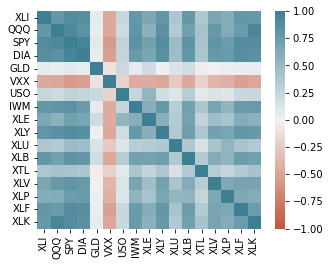

In [11]:
# 상관계수 시각화
# cmap : 데이터 값에 따른 색 공간으로 매핑
# diverging_palette : 두 HUSL 색상으로 팔레트 만듦
# Jupyter에서 choose_diverging_palette() 사용가능
fig, ax = plt.subplots(figsize=(5, 4))
ax = sns.heatmap(etfs.corr(), vmin=-1, vmax=1, 
                 cmap=sns.diverging_palette(20, 220, as_cmap=True),
                 ax=ax)

plt.show()

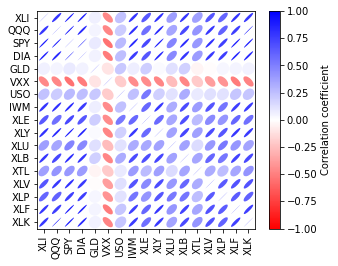

In [9]:
# 포괄적으로 시각화 생성 - 복붙
from matplotlib.collections import EllipseCollection
from matplotlib.colors import Normalize

def plot_corr_ellipses(data, figsize=None, **kwargs):
    ''' https://stackoverflow.com/a/34558488 '''
    M = np.array(data)
    if not M.ndim == 2:
        raise ValueError('data must be a 2D array')
    fig, ax = plt.subplots(1, 1, figsize=figsize, subplot_kw={'aspect':'equal'})
    ax.set_xlim(-0.5, M.shape[1] - 0.5)
    ax.set_ylim(-0.5, M.shape[0] - 0.5)
    ax.invert_yaxis()

    # xy locations of each ellipse center
    xy = np.indices(M.shape)[::-1].reshape(2, -1).T

    # set the relative sizes of the major/minor axes according to the strength of
    # the positive/negative correlation
    w = np.ones_like(M).ravel() + 0.01
    h = 1 - np.abs(M).ravel() - 0.01
    a = 45 * np.sign(M).ravel()

    ec = EllipseCollection(widths=w, heights=h, angles=a, units='x', offsets=xy,
                           norm=Normalize(vmin=-1, vmax=1),
                           transOffset=ax.transData, array=M.ravel(), **kwargs)
    ax.add_collection(ec)

    # if data is a DataFrame, use the row/column names as tick labels
    if isinstance(data, pd.DataFrame):
        ax.set_xticks(np.arange(M.shape[1]))
        ax.set_xticklabels(data.columns, rotation=90)
        ax.set_yticks(np.arange(M.shape[0]))
        ax.set_yticklabels(data.index)

    return ec, ax

m, ax = plot_corr_ellipses(etfs.corr(), figsize=(5, 4), cmap='bwr_r')
cb = fig.colorbar(m, ax=ax)
cb.set_label('Correlation coefficient')

plt.show()

만약 타원이 오른쪽 상단으로 기울어져 있다면 양의 관계, 왼쪽 상단으로 기울어져 있다면 음의 관계이다. 또한, 원의 색깔과 너비는 상관관계의 강도를 의미한다. 얇고 진할수록 더 강한 관계성을 나타낸다.

평균과 표준편차와 같이 상관계수는 데이터의 특잇값에 민감하다. 이러한 클래식한 상관계수를 대체할 수 있는 로버스트한 방법들을 제공하는 소프트웨어 패키지들이 있다. 예를 들어 사이킷런의 모듈 sklearn.covariance에 있는 메서드는 다양한 방식을 제공한다.

NOTE_ 상관관계를 추정하는 다른 방법  
데이터의 순위를 기초로하는 상관계수는 값 자체보다 값의 순위를 이용하기 때문에 이러한 추정법은 특잇값에 좀 더 로버스트하며 비선형 관계도 다룰 수 있다. 이 순위 기반 추정법은 보통 데이터의 크기가 작고 어떤 특별한 가설검정이 필요할 때 주로 사용된다.

## 산점도 : x축과 y축이 서로 다른 두 개의 변수를 나타내는 도표

두 변수 사이의 관계를 시각화하는 가장 기본적인 방법은 산점도를 그려보는 것이다. x, y 축은 각각의 변수들을 의미하고 그래프의 각 점은 하나의 레코드를 의미한다.

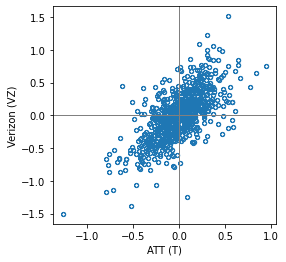

In [10]:
# 산점도
# marker : 원 모양
ax = telecom.plot.scatter(x='T', y='VZ', figsize=(4, 4), marker='$\u25EF$')
ax.set_xlabel('ATT (T)')
ax.set_ylabel('Verizon (VZ)')

# axhline, axvline : 축에 선 그림
ax.axhline(0, color = 'grey', lw = 1)
ax.axvline(0, color = 'grey', lw = 1)

plt.show()

이 두 수익은 0 주변에 모여 있지만 강한 양의 상관성을 보인다. 제1사분면과 제3사분면에 많이 보이고, 제2사분면과 제4사분면에 상대적으로 드물게 보인다.